In [1]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
scores <- read_tsv("../../analysis/kaggle/confidence_by_patient.tsv") %>%
    select(Id, set, score=confidence) %>%
    mutate(confidence=case_when(
        score <= .05 ~ "p05",
        score <= .10 ~ "p10",
        score <= .15 ~ "p15",
        TRUE ~ "rest",
    ))
metadata <- read_tsv("../../analysis/kaggle/patient_metadata.tsv")


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  Id = col_character(),
  predicted_LVEDV = col_double(),
  predicted_LVESV = col_double(),
  predicted_LVEF = col_double(),
  true_LVEDV = col_double(),
  true_LVESV = col_double(),
  true_LVEF = col_double(),
  set = col_character(),
  sys_diff = col_double(),
  sys_perc = col_double(),
  dia_diff = col_double(),
  dia_perc = col_double(),
  confidence = col_double()
)



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PatientsAgeNum = col_character(),
  PatientsAgeUnit = col_character(),
  PatientsSex = col_character(),
  pid = col_character(),
  used = col_logical(),
  se

In [3]:
data <- left_join(metadata, scores, by=c("pid"="Id"))

In [4]:
theme_set(theme_minimal())
options(repr.plot.width = 8, repr.plot.res=200)

In [5]:
gdata <- data %>%
    rename(ESV=Systole, EDV=Diastole) %>%
    gather("measure","value",EF,ESV,EDV) %>%
    mutate(measure = fct_relevel(measure, "EF"))

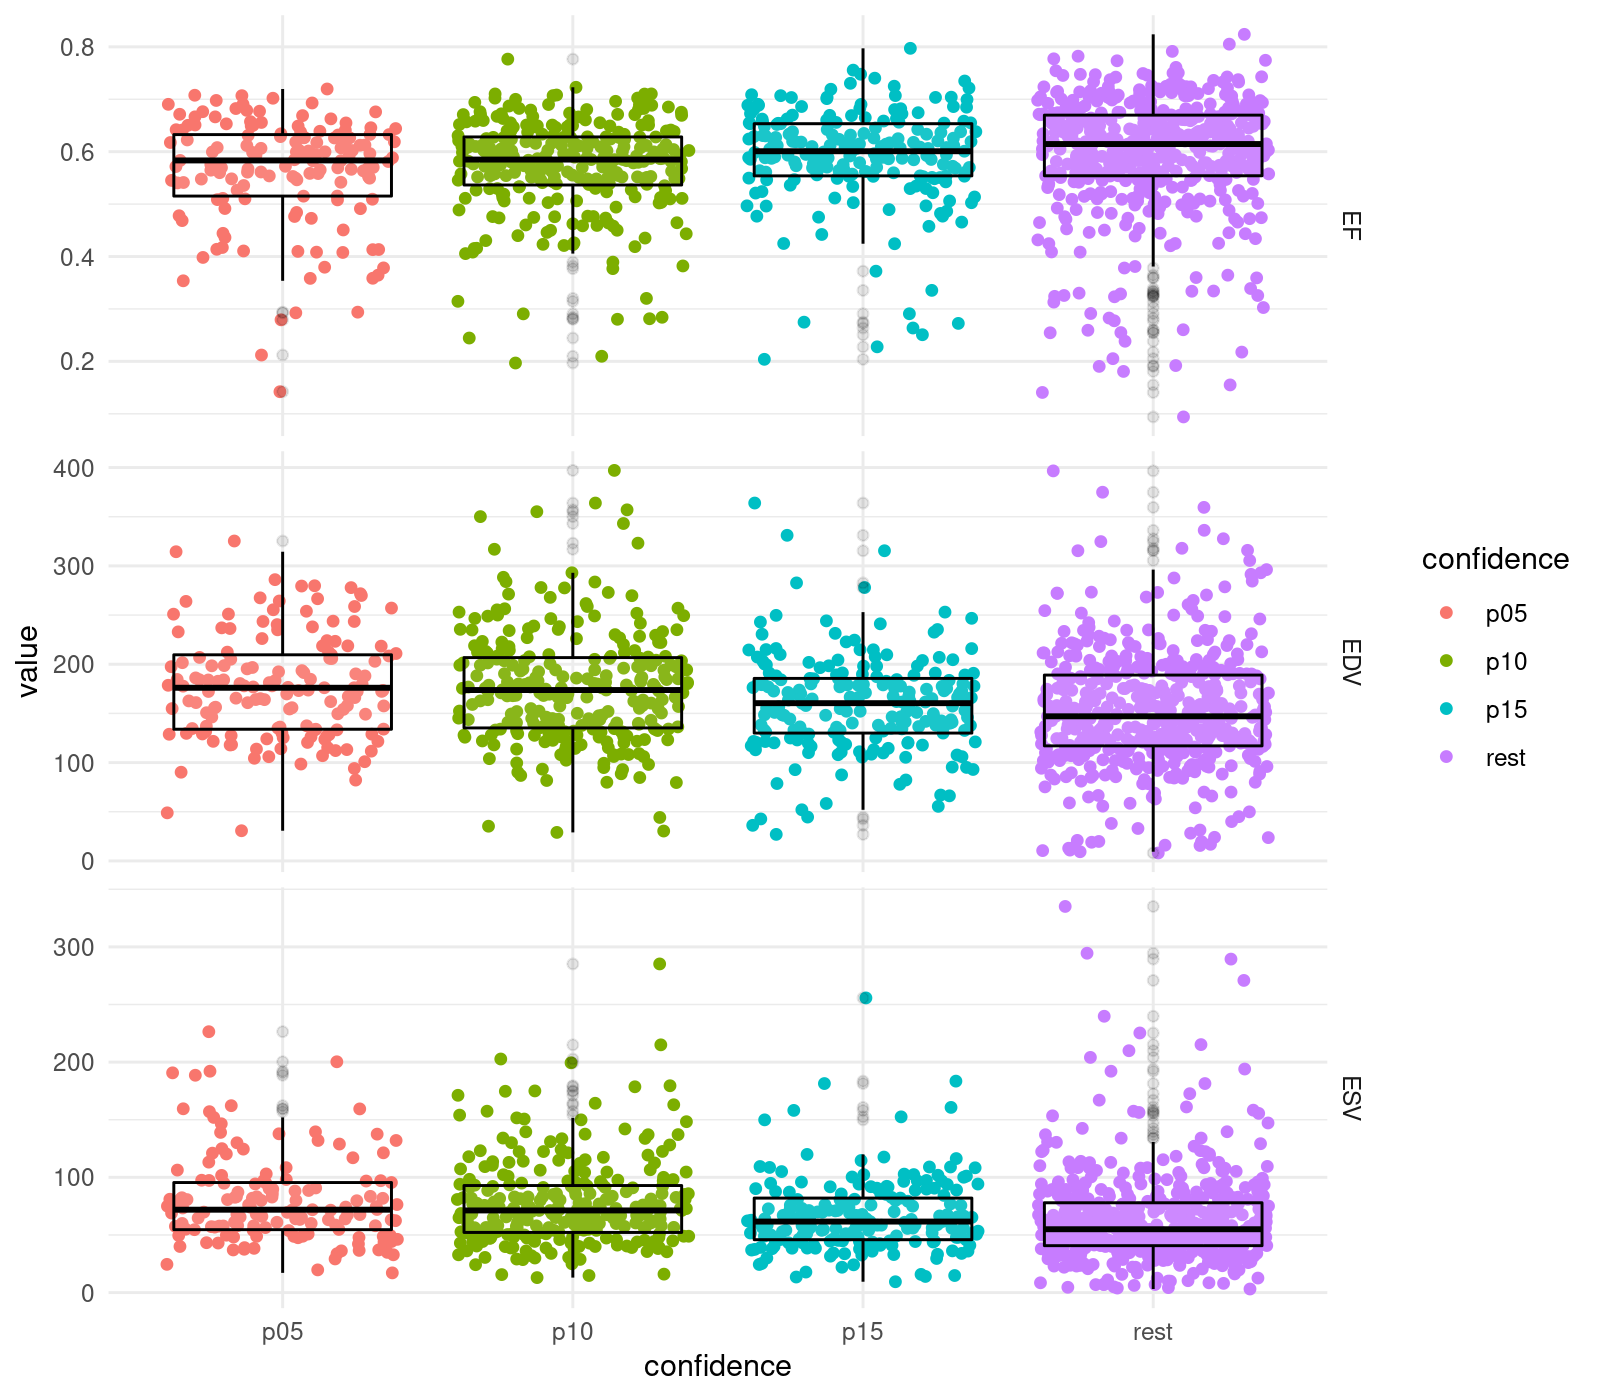

In [6]:
ggplot(gdata %>% filter(value<400), aes(x=confidence, y=value, color=confidence)) + geom_jitter() + geom_boxplot(color="black",alpha=.1) + facet_grid(measure ~ ., scale="free_y")

In [ ]:
ggsave("fig_S1.png", width=10)
ggsave("fig_S1.tiff", width=10)
ggsave("fig_S1.svg", width=10)

Saving 10 x 6.67 in image

Saving 10 x 6.67 in image



In [ ]:
gdata %>%
    group_by(measure, confidence) %>%
    summarize(mean=mean(value), sd=sd(value), median=median(value)) %>%
    mutate_if(is.numeric, round, 2)
    #ungroup %>%
    #select(-sd,-median) %>%
    #pivot_wider(names_from = confidence, values_from=mean)

In [ ]:
ggplot(data %>% filter(confidence != "rest"), aes(x=Systole, y=Diastole, color=confidence)) +
    geom_point(alpha=.2) +
    geom_density2d(adjust=1)
    #geom_hex()

In [ ]:
metadata %>% colnames

In [ ]:
table(data$confidence, data$PatientsSex)

In [ ]:
table(data$confidence, data$MagneticFieldStrength)

In [ ]:
ggplot(
    data %>% group_by(confidence) %>% mutate(FieldStrength=str_c(MagneticFieldStrength,"T")) %>% count(FieldStrength),
    aes(confidence, n, fill=FieldStrength)) +
    geom_col(position="dodge") +
    facet_grid(FieldStrength ~ .)

In [ ]:
ggplot(
    data %>% group_by(confidence) %>% count(PatientsSex),
    aes(confidence, n, fill=PatientsSex)) +
    geom_col(position="dodge") +
    facet_grid(PatientsSex ~ .)